In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

In [4]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

## 1. Statistiques descriptives

### Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation 

In [5]:
full_path_directory = os.path.realpath(os.path.dirname('data/__file__'))
csv_name = 'data_v1.0.csv' 
data = pd.read_csv(os.path.join(full_path_directory, csv_name))
data.head()

,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


### 1.1 Analyse du jeu de données

In [6]:
# Supprimer la premiere colone 'Unnamed: 0', 'index' et 'date' car elles donnent aucune informations importantes
data = data.drop(['Unnamed: 0', 'index'], axis=1)
# Copier la dataset dans la variable df
df = data.copy()
print('Shape de la data : ', df.shape)
df.dtypes.value_counts()

Shape de la data :  (20000, 11)


object     6
float64    4
int64      1
dtype: int64

In [7]:
# Variables Qualitatives
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

date---------------------------------------------- ['2012-06-02' '2011-04-21' '2012-09-07' ... '2011-03-04' '2014-08-26'
 '2011-07-11']
cheveux------------------------------------------- ['roux' 'blond' 'brun' 'chatain' nan]
sexe---------------------------------------------- ['F' 'M' nan]
diplome------------------------------------------- ['licence' 'master' 'doctorat' 'bac' nan]
specialite---------------------------------------- ['geologie' 'forage' 'detective' 'archeologie' nan]
dispo--------------------------------------------- ['non' 'oui' nan]


embauche      0.00000
date          0.00455
age           0.00455
specialite    0.00465
salaire       0.00475
exp           0.00480
sexe          0.00500
cheveux       0.00515
dispo         0.00530
diplome       0.00550
note          0.00570
dtype: float64

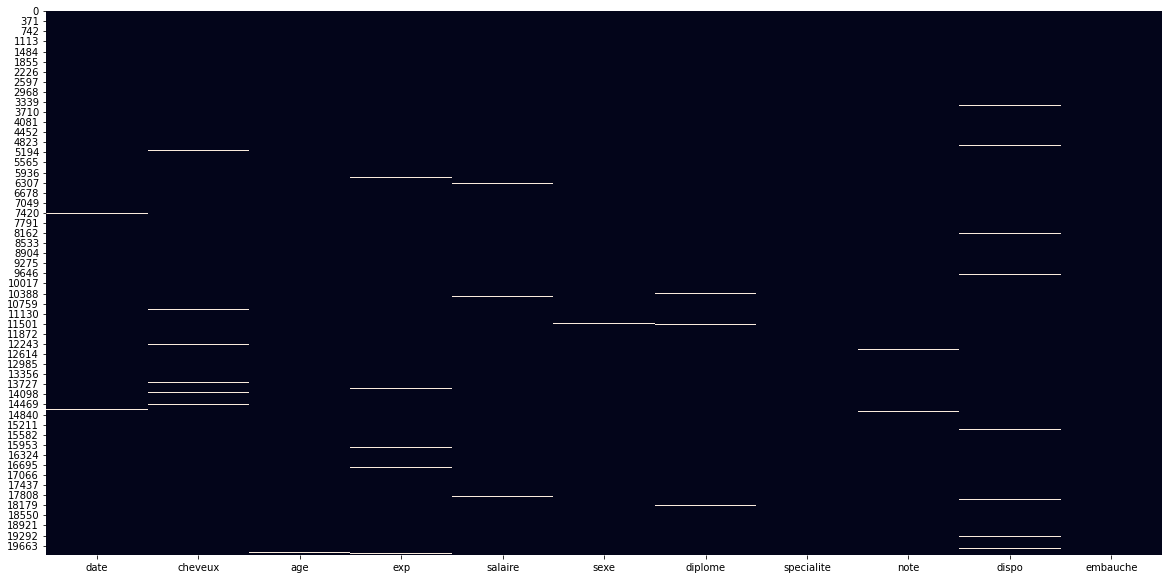

In [9]:
# Analyse des Nan
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

### Checklist de base
#### Analyse de Forme :
- **Variable target** : embauche
- **Lignes et colonnes** : 20000, 11
- **Types de variables** : qualitatives : 6, quantitatives : 5
- **Analyse des valeurs manquantes** :
    - Pas beaucoup de NaN (Presque toutes les features posèdent 0.5% de NaN en moyenne)
    - Quelques featurs qui pourai avoir des lien entre eux (exp, age), (speciatite, salaire, exp), (sexe, cheuveux), (diplome, note)

- **Variables à sélectionner en vue de la prédiction du succès ou de l’échec d’une candidature**
    - exp
    - speciatite
    - diplome
    - note
    - salaire
    - sexe


## Relation target avec les autres variables

In [11]:
# On creer deux sous-ensembles
embauche_df = df[df['embauche'] == 1]
non_embauche_df = df[df['embauche'] == 0]

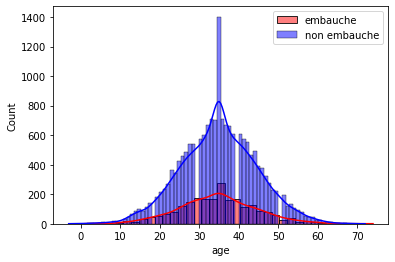

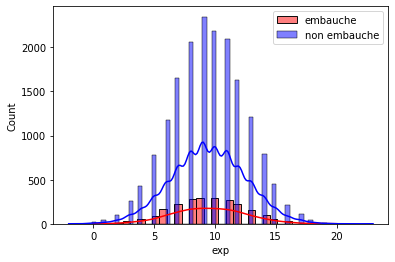

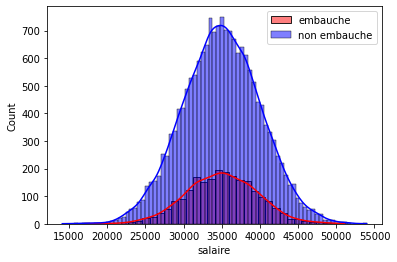

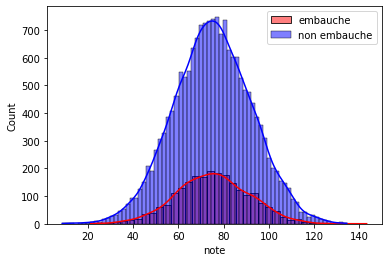

In [12]:
# Relation entre target et variables quantitatives
for col in df.select_dtypes('float64','int64'):
    plt.figure()
    sns.histplot(embauche_df[col], label='embauche', color="red", kde=True)
    sns.histplot(non_embauche_df[col], label='non embauche', color="blue",kde=True)
    plt.legend()

**Remarque** : 
Les représentations graphiques ci-dessous, nous informent clairement que les featurs (grade, salaire, exp et âge) ont une grande influence sur la target (embauche = 0/1). Cela se reflète dans la grande différence entre la distribution (ici gaussian) de probabilité de chaque featurs (grade, salaire, exp et âge) par rapport à la target (embauche = 0/1).

In [13]:
# Supprimer la colone 'date' car elle ne donne pas d'informations pertinentes
df = df.drop(['date'], axis=1)

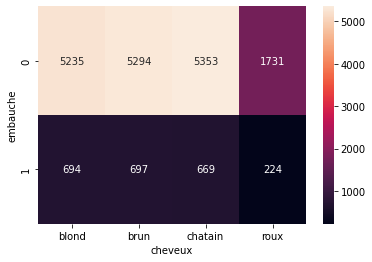

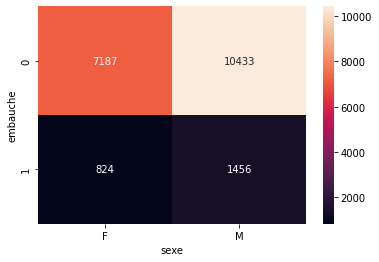

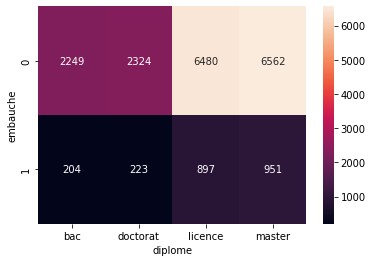

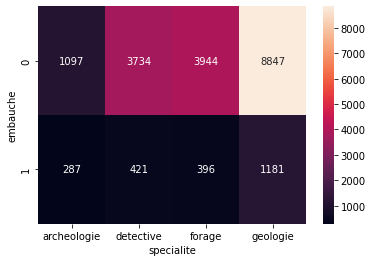

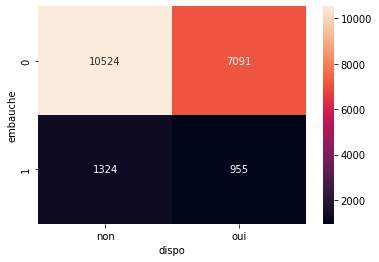

In [14]:
# Relation entre target et variable qualitatives
for col in df.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(df['embauche'], df[col]), annot=True, fmt='d')

**Remarque** :
- Cheuveux : Pas de differences
- sexe : Masculin plus embauché
- diplome : important pour l'embauche (Master plus embauché, puis licence, doctorat et enfin bac)
- spetialité : geologie beaucoup d'embauche, puis detective, forage et enfin archeologie
- dispo : plus d'embauche pour le 'non', bizarre! ou pas!

## 2. Dépendance statistiquement significative entre variables :
### 2.1 La spéecialité et le sexe 

In [54]:
pd.crosstab(df['specialite'], df['sexe'])

sexe,F,M
specialite,,
archeologie,1081,298
detective,2522,1614
forage,1964,2351
geologie,2403,7576


**Remarque** :  
Pourcentage de candidatures :  
- archeologie : 78% de femmes / 22% d'hommes.
- detective : 61% de femme / 39% d'hommes.
- forage : 46% de femmes / 54% d'hommes.
- geologie : 24% de femmes / 76% d'hommes.



In [56]:
pd.crosstab(embauche_df['specialite'], embauche_df['sexe'])

sexe,F,M
specialite,,
archeologie,186,101
detective,216,201
forage,152,240
geologie,266,911


**Remarque** :  
Pourcentage de candidatures acceptées femme/ homme:  
- archeologie : 17% de femmes / 34% d'hommes.
- detective : 8% de femme / 12% d'hommes.
- forage : 8% de femmes / 10% d'hommes.
- geologie : 11% de femmes / 12% d'hommes.

En général, les hommes sont les plus embauchés dans les différents domaines.  



### 2.2 La couleur de cheveux et le salaire demandé

C:\Users\Brani\AppData\Local\Temp\ipykernel_41952\1245821228.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['cheveux']==cat]['salaire'], label=cat)
C:\Users\Brani\AppData\Local\Temp\ipykernel_41952\1245821228.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['cheveux']==cat]['

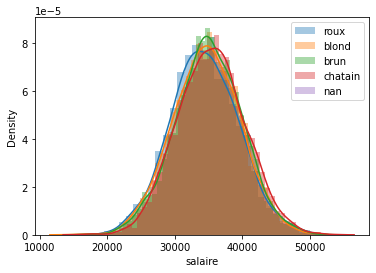

In [59]:
plt.figure()
for cat in df['cheveux'].unique():
    sns.distplot(df[df['cheveux']==cat]['salaire'], label=cat)
plt.legend()

**Remarque** :  
Il est clair que les deux caractéristiques (cheveux et salaire) sont totalement indépendantes, ce qui se traduit par des distributions gaussiennes identiques pour chaque couleur de cheveux par rapport au salaire.

### 2.3 Le nombre d’années d’expérience et la note à l’exercice

<Figure size 640x480 with 0 Axes>

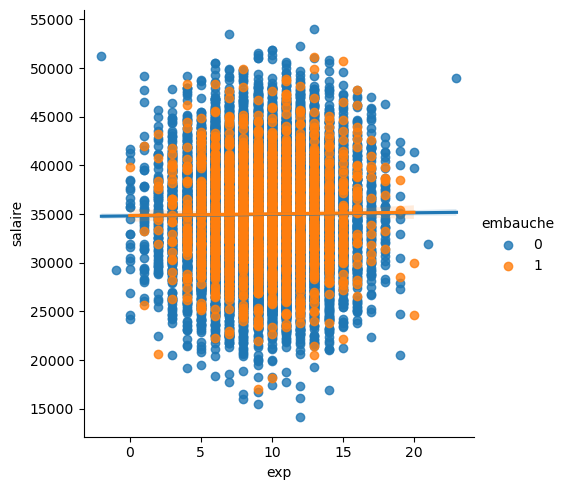

In [55]:
plt.figure()
sns.lmplot(x='exp', y='salaire', hue='embauche', data=df)

In [57]:
print("La correlation entre les deux : ",df['exp'].corr(df['salaire']))

La correlation entre les deux :  0.009709424525642558


**Remarque** : Depuis le graphe on voit les deux droites lineaires l'une sur l'autres.
et la correlation entre ces deux varaibles est tres faibles.
Donc il y'a pas de liens entre ces deux dernieres.